In [1]:
### THIS CELL SETS UP THE GOOGLE COLAB ENVIRONMENT. 
### IF RUNNING THIS NOTEBOOK LOCALLY, IT MAY BE SAFELY DELETED.

#@title Install software

#@markdown #### Installation requires two steps.

#@markdown 1. Install the software by pressing the _Play_ button on the left.

try:
    import google.colab
    RUNNING_IN_COLAB = True
except ImportError:
    RUNNING_IN_COLAB = False
except Exception as e: 
    err = "Could not figure out if runnning in a colab notebook\n"
    raise Exception(err) from e

if RUNNING_IN_COLAB:
    !pip install dataprob


,name,estimate,std,low_95,high_95,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,,,,,
a,a,5.165079,0.375352,4.408607,5.921550,1.0,False,-inf,inf,NaN,NaN
b,b,0.058179,0.085007,-0.113141,0.229498,1.0,False,-inf,inf,NaN,NaN
c,c,0.183673,0.022640,0.138046,0.229301,1.0,False,-inf,inf,NaN,NaN
d,d,0.029360,0.001249,0.026844,0.031877,1.0,False,-inf,inf,NaN,NaN
e,e,0.001229,0.000244,0.000738,0.001719,1.0,False,-inf,inf,NaN,NaN


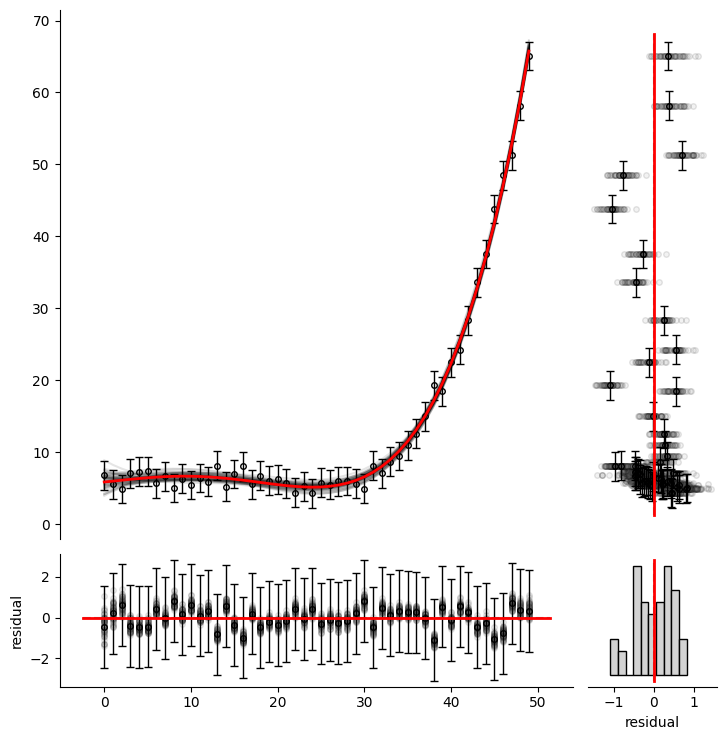

In [2]:
%matplotlib inline
import dataprob
import numpy as np


def fourth_order_polynomial(a=1,b=1,c=1,d=1,e=1,x=None): 
    return a + b*x + c*(x**2) + d*(x**3) + e*(x**4)

gen_params = {"a":5,
              "b":0.01,
              "c":0.2,
              "d":0.03,
              "e":0.001}

err = 1
num_points = 50
x = np.linspace(-10,10,num_points)
y_obs = fourth_order_polynomial(x=x,**gen_params) + np.random.normal(loc=0,scale=err,size=num_points)
y_std = err*2

f = dataprob.setup(fourth_order_polynomial,
                   method="ml",
                   non_fit_kwargs={"x":x})
f.fit(y_obs=y_obs,
      y_std=y_std)

fig = dataprob.plot_summary(f)


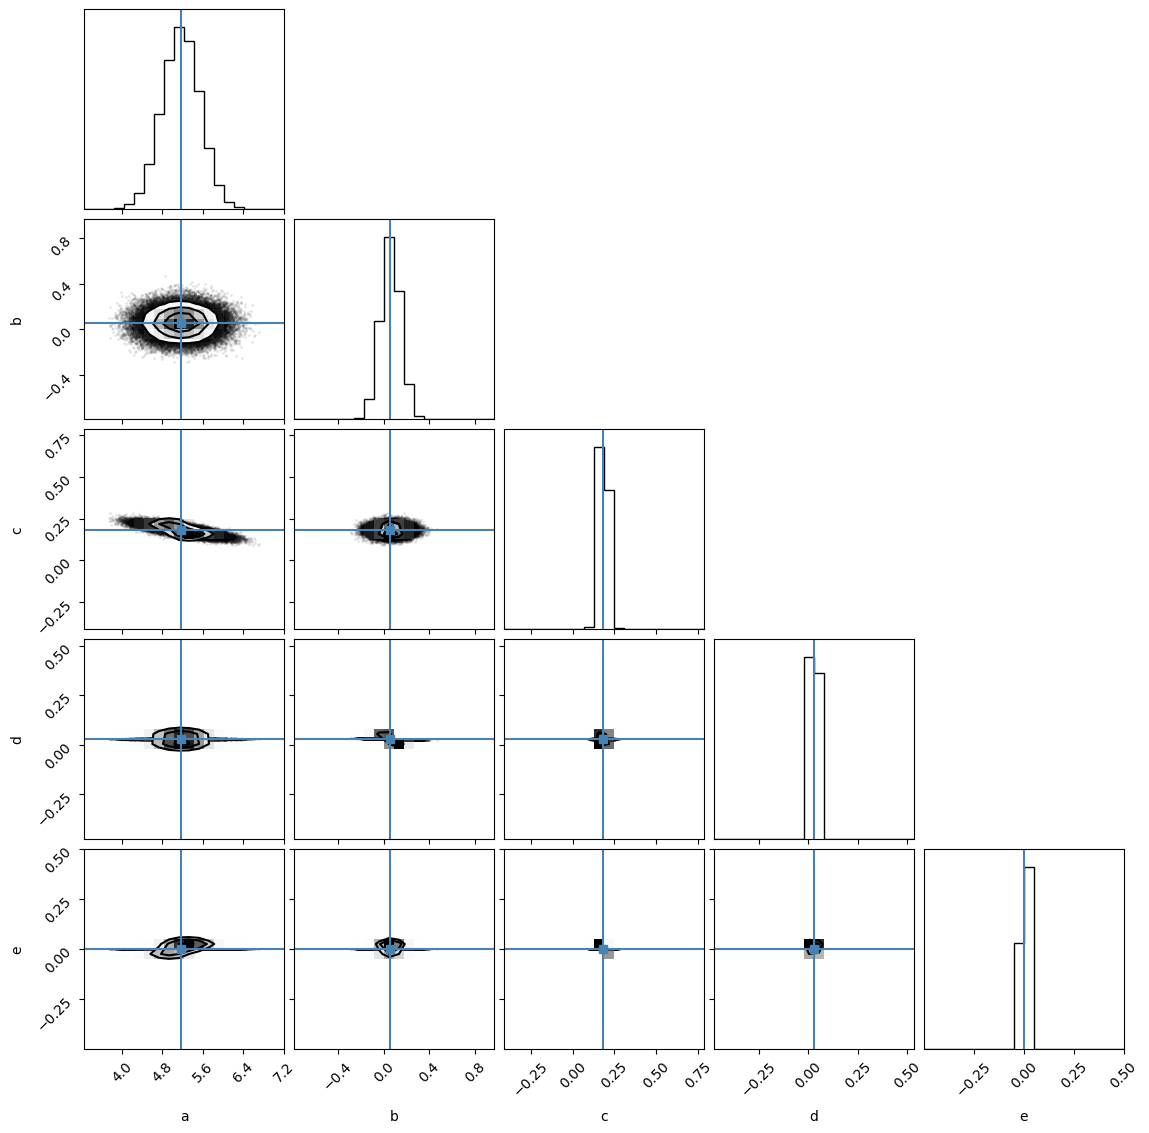

In [4]:
fig = dataprob.plot_corner(f)


In [5]:

f.fit_df


,name,estimate,std,low_95,high_95,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,,,,,
a,a,5.165079,0.375352,4.408607,5.921550,1.0,False,-inf,inf,NaN,NaN
b,b,0.058179,0.085007,-0.113141,0.229498,1.0,False,-inf,inf,NaN,NaN
c,c,0.183673,0.022640,0.138046,0.229301,1.0,False,-inf,inf,NaN,NaN
d,d,0.029360,0.001249,0.026844,0.031877,1.0,False,-inf,inf,NaN,NaN
e,e,0.001229,0.000244,0.000738,0.001719,1.0,False,-inf,inf,NaN,NaN
